Fichier DICOM trouvé : /Users/dtilm/Desktop/P1-Classification/test_images/Case1 [Case1]/20080408 023126 [ - BREAST IMAGING TOMOSYNTHESIS]/Series 72100000 [MG - L CC Tomosynthesis Projection]/1.3.6.1.4.1.5962.99.1.2280943358.716200484.1363785608958.60.0.dcm
Métadonnées du fichier DICOM :
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 216
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.99.1.2280943358.716200484.1363785608958.60.0
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.99.2
(0002, 0013) Implementation Version Name         SH: 'PIXELMEDJAVA001'
(0002, 0016) Source Application Entity Title     AE: 'CLEANER'
-------------------------------------------------
(0

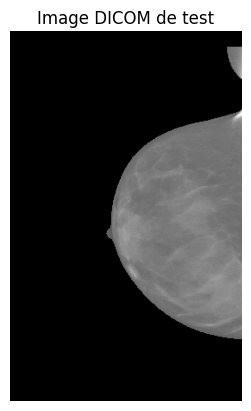

In [1]:
import os
import pydicom
import matplotlib.pyplot as plt

# Chemin vers le dataset
data_path = "/Users/dtilm/Desktop/P1-Classification/test_images/Case1 [Case1]/20080408 023126 [ - BREAST IMAGING TOMOSYNTHESIS]/Series 72100000 [MG - L CC Tomosynthesis Projection]"

# Fonction pour parcourir les dossiers et trouver une image DICOM
def find_dicom_image(data_path):
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith(".dcm"):
                return os.path.join(root, file)  # Retourne le chemin complet du premier fichier .dcm trouvé
    return None

# Trouver une image DICOM
dicom_file = find_dicom_image(data_path)
# Charger l'image DICO
dicom_metadata = pydicom.dcmread(dicom_file)

if dicom_file:
    print(f"Fichier DICOM trouvé : {dicom_file}")
    
    # affichage des métadonnées**
    print("Métadonnées du fichier DICOM :")
    print(dicom_metadata)

    # Extraction avec vérification si les attributs existent
    print("\nInformations spécifiques :")
    print(f"Patient ID : {getattr(dicom_metadata, 'PatientID', 'Non disponible')}")
    print(f"Study Date : {getattr(dicom_metadata, 'StudyDate', 'Non disponible')}")
    print(f"Modality : {getattr(dicom_metadata, 'Modality', 'Non disponible')}")
    print(f"Image Dimensions : {dicom_metadata.pixel_array.shape if hasattr(dicom_metadata, 'pixel_array') else 'Non disponible'}")
    print(f"Bits Stored : {getattr(dicom_metadata, 'BitsStored', 'Non disponible')}")
    print(f"Photometric Interpretation : {getattr(dicom_metadata, 'PhotometricInterpretation', 'Non disponible')}")

    
    # Afficher l'image
    plt.imshow(dicom_metadata.pixel_array, cmap="gray")
    plt.title("Image DICOM de test")
    plt.axis("off")
    plt.show()
else:
    print("Aucune image DICOM trouvée dans le dossier spécifié.")


In [13]:
import pandas as pd

def load_metadata_csvs_test(metadata_path):
    """Charge les fichiers CSV contenant des métadonnées et les combine en un seul DataFrame."""
    csv_files = [
        "calc_case_description_train_set.csv",
        "mass_case_description_train_set.csv"
    ]
    all_metadata = []
    for csv_file in csv_files:
        file_path = os.path.join(metadata_path, csv_file)
        try:
            data = pd.read_csv(file_path)
            all_metadata.append(data)
            print(f"Fichier chargé avec succès : {csv_file}")
        except Exception as e:
            print(f"Erreur lors du chargement de {csv_file} : {e}")
    return pd.concat(all_metadata, ignore_index=True)

load_metadata_csvs_test('/Volumes/SSD/Oncologie/P1-Classification/data/metadata/')
##Soucis avec double breast_density




Fichier chargé avec succès : calc_case_description_train_set.csv
Fichier chargé avec succès : mass_case_description_train_set.csv


,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path,breast_density,mass shape,mass margins
0,P_00005,3.0,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,NaN,NaN,NaN
1,P_00005,3.0,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,NaN,NaN,NaN
2,P_00007,4.0,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,NaN,NaN,NaN
3,P_00007,4.0,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,NaN,NaN,NaN
4,P_00008,1.0,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,P_02033,NaN,RIGHT,MLO,1,mass,NaN,NaN,3,MALIGNANT,4,Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,2.0,IRREGULAR,ILL_DEFINED
2860,P_02079,NaN,RIGHT,CC,1,mass,NaN,NaN,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,2.0,ROUND,SPICULATED
2861,P_02079,NaN,RIGHT,MLO,1,mass,NaN,NaN,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,2.0,ROUND,SPICULATED
2862,P_02092,NaN,LEFT,CC,1,mass,NaN,NaN,3,MALIGNANT,2,Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,2.0,IRREGULAR,SPICULATED


In [14]:
import pandas as pd
import os

def load_metadata_csvs(metadata_path):
    """
    Charge les fichiers CSV contenant des métadonnées, les combine en un seul DataFrame,
    fusionne les colonnes `breast_density` et réorganise les colonnes `mass shape` et `mass margins`.
    Ajoute un comptage des lignes pour chaque CSV et le total des lignes.
    """
    csv_files = [
        "calc_case_description_train_set.csv",
        "mass_case_description_train_set.csv"
    ]
    all_metadata = []

    # Charger les fichiers CSV
    for csv_file in csv_files:
        file_path = os.path.join(metadata_path, csv_file)
        try:
            data = pd.read_csv(file_path)
            print(f"Fichier chargé avec succès : {csv_file}, nombre de lignes : {len(data)}")
            all_metadata.append(data)
        except Exception as e:
            print(f"Erreur lors du chargement de {csv_file} : {e}")
    
    # Combiner les DataFrames
    combined_df = pd.concat(all_metadata, ignore_index=True)
    print(f"Nombre total de lignes dans le DataFrame combiné : {len(combined_df)}")

    # Fusionner les colonnes `breast_density` si elles existent
    if 'breast density' in combined_df.columns and 'breast_density' in combined_df.columns:
        combined_df['breast density'] = combined_df['breast density'].combine_first(combined_df['breast_density'])
        combined_df.drop(columns=['breast_density'], inplace=True)
        if combined_df['breast density'].isna().any() == False:
             print("Les colonnes 'breast density' et 'breast_density' ont été correctement fusionnées.")
    else:
        print("Les colonnes 'breast density' et/ou 'breast_density' ne sont pas présentes.")

    # Renommer explicitement les colonnes problématiques pour utiliser des underscores
    combined_df.rename(columns={
        'mass shape': 'mass_shape',
        'mass margins': 'mass_margins'
    }, inplace=True)

    # Réorganiser les colonnes mass_shape et mass_margins après calc_distribution
    if 'calc distribution' in combined_df.columns and 'mass_shape' in combined_df.columns and 'mass_margins' in combined_df.columns:
        calc_distribution_idx = combined_df.columns.tolist().index('calc distribution')
        columns_order = combined_df.columns.tolist()
        columns_order.remove('mass_shape')
        columns_order.remove('mass_margins')
        columns_order = (
            columns_order[:calc_distribution_idx + 1]
            + ['mass_shape', 'mass_margins']
            + columns_order[calc_distribution_idx + 1:]
        )
        combined_df = combined_df[columns_order]
    else:
        print("Les colonnes 'calc distribution', 'mass_shape' ou 'mass_margins' sont absentes du DataFrame.")

    return combined_df

# Exemple d'appel de la fonction
metadata_path = '/Volumes/SSD/Oncologie/P1-Classification/data/metadata/'
combined_metadata = load_metadata_csvs(metadata_path)


Fichier chargé avec succès : calc_case_description_train_set.csv, nombre de lignes : 1546
Fichier chargé avec succès : mass_case_description_train_set.csv, nombre de lignes : 1318
Nombre total de lignes dans le DataFrame combiné : 2864
Les colonnes 'breast density' et 'breast_density' ont été correctement fusionnées.


2 fichiers DICOM trouvés.
Fichier DICOM trouvé : /Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Train/Calc-Training_P_01548_LEFT_CC_1/09-06-2017-DDSM-NA-86904/1.000000-ROI mask images-88384/1-1.dcm
Métadonnées du fichier DICOM :
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.303953198013884314102253505320083965771
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) S

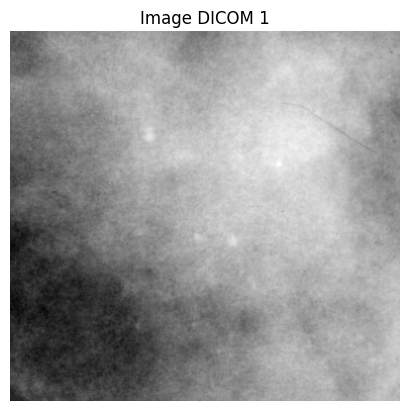

Fichier DICOM trouvé : /Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Train/Calc-Training_P_01548_LEFT_CC_1/09-06-2017-DDSM-NA-86904/1.000000-ROI mask images-88384/1-2.dcm
Métadonnées du fichier DICOM :
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.125682117812365200531525121433222097263
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID              

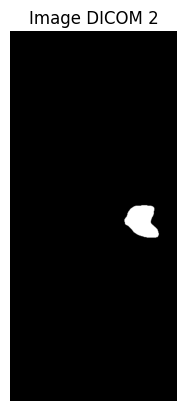

In [15]:
# Fonction pour trouver plusieurs fichiers DICOM
def find_multiple_dicom_images(data_path, max_files=5):
    dicom_files = []
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith(".dcm"):
                dicom_files.append(os.path.join(root, file))
                if len(dicom_files) >= max_files:  # Limite au nombre maximum d'images
                    return dicom_files
    return dicom_files

# Trouver plusieurs fichiers DICOM
dicom_files = find_multiple_dicom_images(data_path, max_files=5)

if dicom_files:
    print(f"{len(dicom_files)} fichiers DICOM trouvés.")
    
    # Parcourir et afficher chaque image DICOM
    for i, dicom_file in enumerate(dicom_files, 1):
        print(f"Fichier DICOM trouvé : {dicom_file}")
        dicom_metadata = pydicom.dcmread(dicom_file)
    
        # affichage des métadonnées
        print("Métadonnées du fichier DICOM :")
        print(dicom_metadata)

        print("\nInformations spécifiques :")
        print(f"Patient ID : {dicom_metadata.PatientID}")
        print(f"Study Date : {dicom_metadata.StudyDate}")
        print(f"Modality : {dicom_metadata.Modality}")
        print(f"Image Dimensions : {dicom_metadata.pixel_array.shape}")
        print(f"Bits Stored : {dicom_metadata.BitsStored}")
        print(f"Series Description: {dicom_metadata.SeriesDescription}")  
        print(f"Photometric Interpretation : {dicom_metadata.PhotometricInterpretation}")
            
        # Afficher l'image
        plt.figure()
        plt.imshow(dicom_metadata.pixel_array, cmap="gray")
        plt.title(f"Image DICOM {i}")
        plt.axis("off")
        plt.show()
else:
    print("Aucune image DICOM trouvée.")


In [16]:
import os
import pydicom
import pandas as pd
import psutil  # Pour mesurer l'utilisation de la mémoire

# Fonction pour surveiller l'utilisation de la mémoire
def memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 ** 2)  # Convertir en Mo

# Fonction pour collecter les caractéristiques des images DICOM
def collect_image_metadata(data_path, max_files=10):
    metadata_list = []
    count = 0
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith(".dcm"):
                dicom_path = os.path.join(root, file)
                dicom_metadata = pydicom.dcmread(dicom_path, force=True)
                try:
                    # Extraire les caractéristiques clés
                    metadata_list.append({
                        "File": dicom_path,
                        "Patient ID": getattr(dicom_metadata, "PatientID", "Non disponible"),
                        "Study Date": getattr(dicom_metadata, "StudyDate", "Non disponible"),
                        "Modality": getattr(dicom_metadata, "Modality", "Non disponible"),
                        "Image Dimensions": dicom_metadata.pixel_array.shape if hasattr(dicom_metadata, 'pixel_array') else "Non disponible",
                        "Bits Stored": getattr(dicom_metadata, "BitsStored", "Non disponible"),
                        "Photometric Interpretation": getattr(dicom_metadata, "PhotometricInterpretation", "Non disponible")
                    })
                except Exception as e:
                    print(f"Erreur lors de la lecture du fichier {dicom_path}: {e}")
                
                count += 1
                if count >= max_files:
                    # On retourne immédiatement le DataFrame après avoir atteint la limite
                    return pd.DataFrame(metadata_list)
    return pd.DataFrame(metadata_list)

# Chemin vers le dataset
data_path = "/Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Calc-Training_P_01548_LEFT_CC_1/"

# Configurer pandas pour afficher toutes les informations des colonnes
pd.set_option('display.max_colwidth', None)  # Afficher les colonnes complètes
pd.set_option('display.max_rows', None)  # Afficher toutes les lignes si nécessaire

# Mesurer la mémoire avant la collecte
print(f"Utilisation mémoire initiale : {memory_usage():.2f} Mo")

# Collecter les métadonnées de plusieurs images
image_metadata = collect_image_metadata(data_path, max_files=11)  # Modifie max_files si nécessaire

# Mesurer la mémoire après la collecte
print(f"Utilisation mémoire après collecte : {memory_usage():.2f} Mo")

# Afficher toutes les données collectées
print(image_metadata)


Utilisation mémoire initiale : 161.53 Mo
Utilisation mémoire après collecte : 161.58 Mo
Empty DataFrame
Columns: []
Index: []


In [ ]:
import os

def count_files_by_subfolder(root_dir):
    counts = {}
    
    for subset in ["Train", "Test"]:  # Parcourt Train et Test
        subset_dir = os.path.join(root_dir, subset)
        total_files = 0
        
        for folder1 in os.listdir(subset_dir):  # Premier niveau
            folder1_path = os.path.join(subset_dir, folder1)
            if os.path.isdir(folder1_path):
                for folder2 in os.listdir(folder1_path):  # Deuxième niveau
                    folder2_path = os.path.join(folder1_path, folder2)
                    if os.path.isdir(folder2_path):
                        for folder3 in os.listdir(folder2_path):  # Troisième niveau
                            folder3_path = os.path.join(folder2_path, folder3)
                            if os.path.isdir(folder3_path):
                                # Compte les fichiers .dcm dans le dernier niveau
                                dcm_files = [
                                    f for f in os.listdir(folder3_path)
                                    if f.endswith(".dcm")
                                ]
                                total_files += len(dcm_files)
        
        counts[subset] = total_files
    
    return counts

# Exemple d'utilisation
root_directory = "/Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/"
counts = count_files_by_subfolder(root_directory)
print(counts)



In [ ]:
import os
import shutil

# Chemin vers le répertoire contenant toutes les données
source_directory = "/Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/"
train_directory = os.path.join(source_directory, "Train")
test_directory = os.path.join(source_directory, "Test")

# Créer les répertoires "Train" et "Test" s'ils n'existent pas déjà
os.makedirs(train_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)

# Parcourir les dossiers du répertoire source
for folder_name in os.listdir(source_directory):
    folder_path = os.path.join(source_directory, folder_name)

    # Vérifier si c'est un dossier
    if os.path.isdir(folder_path) and folder_name not in ["Train", "Test"]:
        # Si le nom contient "Training" après le premier "-", déplacer dans "Train"
        if "Training" in folder_name.split("-")[1]:
            shutil.move(folder_path, os.path.join(train_directory, folder_name))
        # Sinon, déplacer dans "Test"
        else:
            shutil.move(folder_path, os.path.join(test_directory, folder_name))

print("Organisation terminée : les dossiers ont été déplacés dans 'Train' et 'Test'.")



In [ ]:
import time

def predict_loading_time(data_path, max_files, sample_size=100):
    """
    Prédit le temps de chargement des fichiers en fonction d'un échantillon.
    
    :param data_path: Chemin vers le répertoire des fichiers DICOM.
    :param max_files: Nombre maximal de fichiers à charger.
    :param sample_size: Taille de l'échantillon pour estimer le temps.
    :return: Temps estimé pour charger max_files fichiers.
    """
    # Étape 1 : Charger un échantillon de fichiers et mesurer le temps
    start_time = time.time()
    extract_dicom_metadata_from_directory(data_path, max_files=50)
    elapsed_time = time.time() - start_time

    # Étape 2 : Extrapoler le temps total pour max_files
    estimated_time = (elapsed_time / sample_size) * max_files

    print(f"Temps pour charger un échantillon de {sample_size} fichiers : {elapsed_time:.2f} secondes")
    print(f"Estimation du temps pour {max_files} fichiers : {estimated_time:.2f} secondes ({estimated_time / 60:.2f} minutes)")

    return estimated_time

# Exemple d'utilisation
data_path = "/Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Train/"
max_files = 8500  # Le nombre de fichiers que vous voulez charger
predict_loading_time(data_path, max_files)


In [20]:
import os
import pandas as pd
import pydicom
import re

def extract_radical(patient_id):
    """
    Extrait le radical au format `P_XXXXX_LEFT_CC` ou similaire
    depuis un patient_id, quel que soit son format initial.
    """
    match = re.search(r'(P_\d+_[A-Z]+_[A-Z]+)', patient_id)
    return match.group(1) if match else None

def get_patient_id_type(patient_id):
    """
    Détermine le type de patient_id.
    """
    if patient_id.endswith(".dcm") and not any(c.isdigit() for c in patient_id.split('_')[-2:]):
        return 'global_image'  # Cas d'image globale
    else:
        return 'anomaly'  # Cas d'anomalie spécifique

def extract_dicom_metadata_from_directory(data_path, max_files=550):
    """Extrait les métadonnées DICOM pour les fichiers d'un répertoire donné."""
    metadata_list = []
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith(".dcm"):
                dicom_path = os.path.join(root, file)
                try:
                    dicom_data = pydicom.dcmread(dicom_path, force=True)
                    # Vérifiez si PatientID existe
                    if not hasattr(dicom_data, "PatientID"):
                        print(f"Fichier sans PatientID ignoré : {dicom_path}")
                        continue
                    patient_id = dicom_data.PatientID
                    radical = extract_radical(patient_id)

                    # Création du dictionnaire de métadonnées
                    metadata_list.append({
                        "patient_id": patient_id,
                        "radical": radical,
                        "modality": getattr(dicom_data, "Modality", "Non disponible"),
                        "series_description": getattr(dicom_data, "SeriesDescription", "Non disponible"),
                        "image_dimensions": dicom_data.pixel_array.shape if hasattr(dicom_data, "pixel_array") else "Non disponible",
                        "bits_stored": getattr(dicom_data, "BitsStored", "Non disponible"),
                        "photometric_interpretation": getattr(dicom_data, "PhotometricInterpretation", "Non disponible"),
                        "image_file_path": dicom_path
                    })
                except Exception as e:
                    print(f"Erreur lors de la lecture de {dicom_path}: {e}")
                
                # Limiter le nombre de fichiers scannés (optionnel)
                if len(metadata_list) >= max_files:
                    break
        if len(metadata_list) >= max_files:
            break

    print(f"Nombre total de fichiers DICOM traités : {len(metadata_list)}")
    return pd.DataFrame(metadata_list)


# Charger les métadonnées Dicom 
data_path = "/Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Train/"
dicom_metadata_df = extract_dicom_metadata_from_directory(data_path)

# Charger les métadonnées CSV
metadata_path = '/Volumes/SSD/Oncologie/P1-Classification/data/metadata/'
csv_metadata_df = load_metadata_csvs(metadata_path)

# Ajouter 'patient_id_type' à dicom_metadata_df avant le merge
dicom_metadata_df['patient_id_type'] = dicom_metadata_df['patient_id'].apply(get_patient_id_type)

# Vérifier si le DataFrame contient des données
print("\nAperçu de dicom_metadata_df :")
print(dicom_metadata_df.head())

# Ajouter la colonne radical à csv_metadata_df
csv_metadata_df['radical'] = (
    csv_metadata_df['patient_id'] + "_" +
    csv_metadata_df['left or right breast'] + "_" +
    csv_metadata_df['image view']
)

# Vérification
print("Aperçu des métadonnées CSV avec radical :")
print(csv_metadata_df.head())

# Réaliser le merge basé sur le radical
merged_df = pd.merge(dicom_metadata_df, csv_metadata_df, on="radical", how="left")

# Harmoniser les colonnes de dicom_metadata_df
merged_df.columns = (
    merged_df.columns.str.lower()  # Convertir en minuscules
    .str.replace(" ", "_")                 # Remplacer les espaces par des underscores
)

# Vérifier les colonnes disponibles
print("Colonnes dans merged_df :", merged_df.columns)


# Définir les champs à remplir pour chaque type
fields_to_keep = [
    'modality', 'image_dimensions', 'bits_stored', 'photometric_interpretation',
    'breast_density', 'left_or_right_breast', 'image_view', 'image_file_path'
]

# Remplir uniquement les champs nécessaires pour les images globales
for field in fields_to_keep:
    merged_df[field] = merged_df.apply(
        lambda row: row[field] if row['patient_id_type'] == 'global_image' else row[field],
        axis=1
    )

# Supprimer les colonnes inutiles après le merge
merged_df.drop(columns=['radical', 'patient_id_type'], inplace=True)


# Renommer les colonnes `patient_id_x` et `patient_id_y` pour les rendre explicites
merged_df.rename(columns={
    "patient_id_x": "patient_id_dicom",
    "patient_id_y": "patient_id_csv",
}, inplace=True)

# Identifier les colonnes contenant "image_file_path" et les renommer précisément
image_file_path_cols = [i for i, col in enumerate(merged_df.columns) if "image_file_path" in col]

print("Indices des colonnes 'image_file_path':", image_file_path_cols)

# Vérifier qu'il y a au moins 2 occurrences de "image_file_path"
if len(image_file_path_cols) >= 2:
    # Renommer les deux premières occurrences uniquement
    merged_df.columns.values[image_file_path_cols[0]] = "image_file_path_dicom"  # Première occurrence
    merged_df.columns.values[image_file_path_cols[1]] = "image_file_path_csv"    # Deuxième occurrence
else:
    print("Erreur : Colonnes 'image_file_path' insuffisantes pour renommage.")

# Vérifier le résultat des colonnes après renommage
print("Colonnes après renommage :", merged_df.columns.tolist())

# Réorganiser les colonnes pour que `patient_id_csv` soit juste après `patient_id_dicom`
column_order = merged_df.columns.tolist()
if "patient_id_dicom" in column_order and "patient_id_csv" in column_order:
    # Retirer `patient_id_csv` de sa position actuelle
    column_order.remove("patient_id_csv")
    # Trouver l'index de `patient_id_dicom` et insérer `patient_id_csv` juste après
    dicom_index = column_order.index("patient_id_dicom")
    column_order.insert(dicom_index + 1, "patient_id_csv")
    # Réorganiser les colonnes du DataFrame
    merged_df = merged_df[column_order]


# Afficher un aperçu des données fusionnées
print("\nAperçu des métadonnées fusionnées :")
print(merged_df.head())


Nombre total de fichiers DICOM traités : 550
Fichier chargé avec succès : calc_case_description_train_set.csv, nombre de lignes : 1546
Fichier chargé avec succès : mass_case_description_train_set.csv, nombre de lignes : 1318
Nombre total de lignes dans le DataFrame combiné : 2864
Les colonnes 'breast density' et 'breast_density' ont été correctement fusionnées.

Aperçu de dicom_metadata_df :
                          patient_id            radical modality  \
0     Calc-Training_P_00005_RIGHT_CC   P_00005_RIGHT_CC       MG   
1   Calc-Training_P_00005_RIGHT_CC_1   P_00005_RIGHT_CC       MG   
2   Calc-Training_P_00005_RIGHT_CC_1   P_00005_RIGHT_CC       MG   
3    Calc-Training_P_00005_RIGHT_MLO  P_00005_RIGHT_MLO       MG   
4  Calc-Training_P_00005_RIGHT_MLO_1  P_00005_RIGHT_MLO       MG   

      series_description image_dimensions  bits_stored  \
0  full mammogram images     (5056, 2761)           16   
1        ROI mask images     (5056, 2761)            8   
2         cropped imag

In [22]:
print(merged_df)

                       patient_id_dicom patient_id_csv modality  \
0        Calc-Training_P_00005_RIGHT_CC        P_00005       MG   
1      Calc-Training_P_00005_RIGHT_CC_1        P_00005       MG   
2      Calc-Training_P_00005_RIGHT_CC_1        P_00005       MG   
3       Calc-Training_P_00005_RIGHT_MLO        P_00005       MG   
4     Calc-Training_P_00005_RIGHT_MLO_1        P_00005       MG   
5     Calc-Training_P_00005_RIGHT_MLO_1        P_00005       MG   
6         Calc-Training_P_00007_LEFT_CC        P_00007       MG   
7       Calc-Training_P_00007_LEFT_CC_1        P_00007       MG   
8       Calc-Training_P_00007_LEFT_CC_1        P_00007       MG   
9        Calc-Training_P_00007_LEFT_MLO        P_00007       MG   
10     Calc-Training_P_00007_LEFT_MLO_1        P_00007       MG   
11     Calc-Training_P_00007_LEFT_MLO_1        P_00007       MG   
12        Calc-Training_P_00008_LEFT_CC        P_00008       MG   
13        Calc-Training_P_00008_LEFT_CC        P_00008       M

In [23]:
# Supposons que vous ayez déjà fait un filtrage
# merged_df = merged_df[~merged_df['series_description'].str.lower().str.contains('mask')]

# Vérification simple
if merged_df['series_description'].str.lower().str.contains('mask').any():
    print("Des lignes contiennent encore 'mask' dans series_description !")
else:
    print("Le filtre 'mask' semble avoir été correctement appliqué : aucune occurrence de 'mask'.")
# Vérifier s'il existe encore des lignes contenant 'mask' dans series_description
has_mask = merged_df['series_description'].str.lower().str.contains('mask', na=False).any()
if has_mask:
    print("Des lignes contiennent encore le mot 'mask'. On va les supprimer.")

    # Créer un filtre pour repérer ces lignes
    mask_filter = merged_df['series_description'].str.lower().str.contains('mask', na=False)

    # Supprimer ces lignes (on garde l'inverse du filtre avec ~)
    before_count = len(merged_df)
    merged_df = merged_df[~mask_filter].copy()
    after_count = len(merged_df)

    print(f"Lignes avant filtrage : {before_count}")
    print(f"Lignes après filtrage : {after_count}")
else:
    print("Aucune occurrence de 'mask' dans series_description.")

# Optionnel: Afficher le nombre de lignes
print(f"Nombre de lignes après filtrage : {len(merged_df)}")

# Vous pouvez aussi inspecter les valeurs uniques de series_description
print("Valeurs uniques dans series_description :", merged_df['series_description'].unique())


# Sauvegarder les données 
merged_df.to_pickle("merged_df.pkl")

Des lignes contiennent encore 'mask' dans series_description !
Des lignes contiennent encore le mot 'mask'. On va les supprimer.
Lignes avant filtrage : 1046
Lignes après filtrage : 629
Nombre de lignes après filtrage : 629
Valeurs uniques dans series_description : ['full mammogram images' 'cropped images']


In [24]:
from sklearn.utils import resample
import pandas as pd

# Charger le DataFrame initial
merged_df = pd.read_pickle("merged_df.pkl")

# Ajouter une colonne 'label' à partir de la colonne 'pathology'
label_mapping = {'BENIGN_WITHOUT_CALLBACK': 0, 'BENIGN': 1, 'MALIGNANT': 2}
merged_df['label'] = merged_df['pathology'].map(label_mapping)

# Afficher les distributions initiales
print("Distribution initiale des labels :")
print(merged_df['label'].value_counts())

# Séparer les données par classes
class_0 = merged_df[merged_df['label'] == 0]  # BENIGN_WITHOUT_CALLBACK
class_1 = merged_df[merged_df['label'] == 1]  # BENIGN
class_2 = merged_df[merged_df['label'] == 2]  # MALIGNANT

# Définir la taille cible pour équilibrer les classes
target_size = max(len(class_0), len(class_1), len(class_2))

# Appliquer l'oversampling pour les classes sous-représentées
class_1_upsampled = resample(class_1, replace=True, n_samples=target_size, random_state=42)
class_2_upsampled = resample(class_2, replace=True, n_samples=target_size, random_state=42)

# Combiner les données pour obtenir un ensemble équilibré
balanced_data = pd.concat([class_0, class_1_upsampled, class_2_upsampled])

# Mélanger les données
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Afficher la distribution après équilibrage
print("Distribution après équilibrage :")
print(balanced_data['label'].value_counts())

# Sauvegarder les données équilibrées
balanced_data.to_pickle("balanced_data.pkl")
print("Données équilibrées sauvegardées dans 'balanced_data.pkl'.")


Distribution initiale des labels :
label
0    316
2    164
1    149
Name: count, dtype: int64
Distribution après équilibrage :
label
1    316
2    316
0    316
Name: count, dtype: int64
Données équilibrées sauvegardées dans 'balanced_data.pkl'.


Répartition des classes :
label
1    316
2    316
0    316
Name: count, dtype: int64


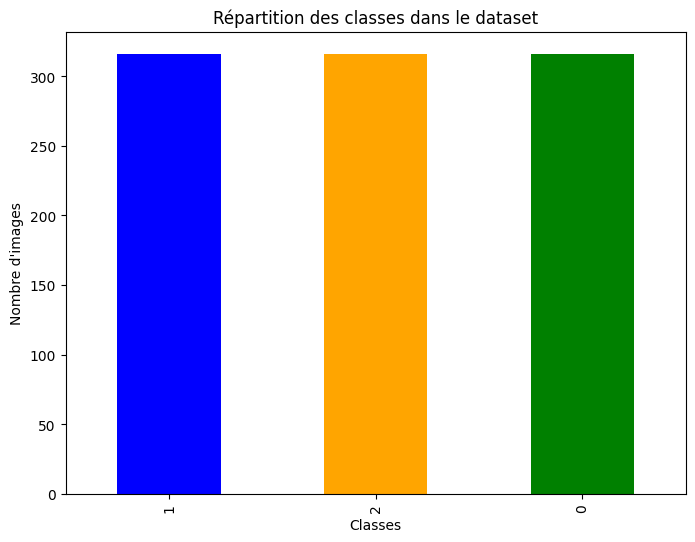

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier balanced_data.pkl
balanced_data = pd.read_pickle("balanced_data.pkl")

# Vérifier les proportions des labels
class_counts = balanced_data['label'].value_counts()
print("Répartition des classes :")
print(class_counts)

# Visualiser la répartition
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title("Répartition des classes dans le dataset")
plt.xlabel("Classes")
plt.ylabel("Nombre d'images")
plt.show()


In [ ]:
import os

# Vérifier si tous les fichiers existent
balanced_data['exists'] = balanced_data['image_file_path_dicom'].apply(lambda x: os.path.exists(x))
missing_files = balanced_data[~balanced_data['exists']]
print(f"Nombre de fichiers manquants : {len(missing_files)}")

# Afficher les fichiers manquants (si applicable)
if len(missing_files) > 0:
    print("Chemins des fichiers manquants :")
    print(missing_files['image_file_path_dicom'].tolist())


In [ ]:
# Vérifier les doublons dans les chemins des fichiers
duplicated_files = balanced_data[balanced_data['image_file_path_dicom'].duplicated()]
print(f"Nombre de doublons : {len(duplicated_files)}")

# Afficher les doublons (si applicable)
if len(duplicated_files) > 0:
    print("Doublons trouvés :")
    print(duplicated_files['image_file_path_dicom'].tolist())


In [ ]:
# Vérifier les valeurs uniques dans la colonne 'label'
unique_labels = balanced_data['label'].unique()
print(f"Valeurs uniques des labels : {unique_labels}")

# Vérifier si des labels sont inattendus
expected_labels = {0, 1, 2}
unexpected_labels = set(unique_labels) - expected_labels
if len(unexpected_labels) > 0:
    print(f"Labels inattendus trouvés : {unexpected_labels}")
else:
    print("Tous les labels sont conformes.")


In [ ]:
import pydicom
import matplotlib.pyplot as plt

# Fonction pour afficher une image DICOM
def show_dicom_image(file_path):
    try:
        dicom_data = pydicom.dcmread(file_path)
        plt.imshow(dicom_data.pixel_array, cmap='gray')
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Erreur lors de la lecture de {file_path}: {e}")

# Afficher quelques exemples d'images pour chaque label
for label in [0, 1, 2]:
    print(f"Exemples pour le label {label} :")
    sample_files = balanced_data[balanced_data['label'] == label]['image_file_path_dicom'].sample(3)
    for file_path in sample_files:
        print(file_path)
        show_dicom_image(file_path)


In [ ]:
import pydicom

# Vérifier les dimensions des 5 premières images
def get_dicom_dimensions(file_path):
    try:
        dicom_data = pydicom.dcmread(file_path)
        return dicom_data.pixel_array.shape
    except Exception as e:
        print(f"Erreur lors de la lecture de {file_path}: {e}")
        return None

# Appliquer la fonction sur les 5 premières lignes
sample_data = balanced_data.head(5)
sample_data['image_dimensions'] = sample_data['image_file_path_dicom'].apply(get_dicom_dimensions)

# Afficher les résultats
print("Dimensions des 5 premières images :")
print(sample_data[['image_file_path_dicom', 'image_dimensions']])


In [ ]:
import pandas as pd

# Charger le fichier
balanced_data = pd.read_pickle("balanced_data.pkl")

# Compter le nombre de lignes
num_rows = balanced_data.shape[0]
print(f"Le fichier 'balanced_data.pkl' contient {num_rows} lignes.")




In [ ]:
import pandas as pd
import numpy as np

# Load the original data (you might need to adjust this based on how it was originally created)
original_filepath = "/Users/dtilm/Desktop/P1-Classification/notebook/balanced_data.pkl"
new_filepath = "/Users/dtilm/Desktop/P1-Classification/notebook/balanced_data_new.pkl"

# Try different loading methods
try:
    # Method 1: Standard read
    df = pd.read_pickle(original_filepath)
except Exception as e:
    print(f"Standard read failed: {e}")
    
    try:
        # Method 2: Load with specific encoding
        with open(original_filepath, 'rb') as f:
            df = pd.read_pickle(f, encoding='latin-1')
    except Exception as e:
        print(f"Encoding read failed: {e}")
        # If this fails, you might need to manually reconstruct the DataFrame

# Resave with compatibility
df.to_pickle(new_filepath, protocol=4)
print(f"New pickle file saved to {new_filepath}")

In [ ]:
import pandas as pd
import numpy as np
import pickle
import os

def recover_pickle_file(filepath):
    """
    Attempt to recover a corrupted pandas DataFrame pickle file
    """
    print("Attempting to recover pickle file...")
    
    # Multiple recovery strategies
    recovery_methods = [
        # Method 1: Standard load with error handling
        lambda f: pd.read_pickle(f),
        
        # Method 2: Direct pickle load with bytes encoding
        lambda f: pickle.load(open(f, 'rb'), encoding='bytes'),
        
        # Method 3: Direct pickle load with latin-1 encoding
        lambda f: pickle.load(open(f, 'rb'), encoding='latin-1'),
        
        # Method 4: Try alternative unpickling
        lambda f: pd.read_pickle(f, compression=None)
    ]
    
    # Try each recovery method
    for i, method in enumerate(recovery_methods, 1):
        try:
            print(f"Trying recovery method {i}")
            data = method(filepath)
            
            # Validate the loaded data
            if isinstance(data, pd.DataFrame):
                print("Successfully recovered DataFrame!")
                print("DataFrame Info:")
                print(data.info())
                return data
            elif isinstance(data, dict):
                print("Recovered a dictionary. Converting to DataFrame...")
                df = pd.DataFrame(data)
                print("DataFrame Info:")
                print(df.info())
                return df
            else:
                print(f"Recovered data is of type {type(data)}")
        
        except Exception as e:
            print(f"Method {i} failed: {e}")
    
    # Final fallback
    print("All recovery methods failed.")
    return None

def save_recovered_data(data, original_filepath):
    """
    Save recovered data to a new pickle file
    """
    if data is not None:
        new_filepath = original_filepath.replace('.pkl', '_recovered.pkl')
        try:
            data.to_pickle(new_filepath, protocol=4)
            print(f"Recovered data saved to {new_filepath}")
            return new_filepath
        except Exception as e:
            print(f"Failed to save recovered data: {e}")
    return None

def main():
    filepath = "/Users/dtilm/Desktop/P1-Classification/notebook/balanced_data.pkl"
    
    # Attempt to recover the pickle file
    recovered_data = recover_pickle_file(filepath)
    
    # Save the recovered data
    if recovered_data is not None:
        new_filepath = save_recovered_data(recovered_data, filepath)
        
        # Optional: Verify the new file can be loaded
        if new_filepath:
            try:
                test_load = pd.read_pickle(new_filepath)
                print("New pickle file successfully loaded!")
                print(test_load.info())
            except Exception as e:
                print(f"Failed to load new pickle file: {e}")

if __name__ == '__main__':
    main()